## Observations and Insights 

In this animal study, 249 mice identified with squamous cell carcinoma (SCC) - a commonly occurring form of skin cancer, tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other most promising treatment regimens: Ramicane, Infubinol, and Ceftamin.

A breakdown of the Sumary Statistics data points for each treatment regimen shows that: Capomulin had the highest tumor volume of 230 with a Median of 41.56; Ramicane had 228 with a Median of 40.67; Infubinol had 178 with a Median of 51.82 and Ceftamin had 178 with a Median of 51.78. The data therefore is of statistical significance since the number of data points for each Drug Regimen is above 30.

Based on the average final tumor volume, both Capomulin and Ramicane both were much more effective in reducing tumor volume in the mice over the 45-day study period than Infubinol and Ceftamin. Capomulin had the best statistical scores overall. It  was more consistent than Ramicane as illustrated by the shortness of its box. Only infubinol registered an outlier.

The line Plot Timepoint versus Tumor Volume shows a downward trend of tumor shrinkage in the mice treated by Capomulin. This implies that this treatment over a longer period of time should lead to more shrinkage in the tumor volume with the other variables remaining constant.

There was a strong correlation between the weight of the mouse (R-squared of 0.84) and their average tumor volume. Suggesting that to have positive results the weight of the mouse must be controlled otherwise correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of the drug’s efficacy.

Finally, the study results showed a very balanced gender distribution of 49.1% female versus 50.9 male mice participants.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_Dups = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
print(mouse_study_data_Dups["Mouse ID"].count())
mouse_study_data_Dups.head()

1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_study_data_Dups[["Mouse ID", "Timepoint"]].duplicated(keep=False)
mouse_dup

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [3]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_duplicates = mouse_study_data_Dups[mouse_dup]
mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop all duplicate entries as suggested by instructions
mouse_study_data = mouse_study_data_Dups[~mouse_dup]
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
print(mouse_study_data["Mouse ID"].count())

1883


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Define a template DataFrame to dreive different statistics methods for the required values specified abobe
temp_stats = mouse_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
avg_stats = temp_stats.mean()
med_stats = temp_stats.median()
var_stats = temp_stats.var()
std_stats = temp_stats.std()
sem_stats = temp_stats.sem()

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Combine the five Series above to derive Summary Statistics DataFrame after formatting
summary_stats = pd.DataFrame({"Mean": avg_stats, "Median": med_stats, "Variance": var_stats, "Standard Deviation": std_stats,
                              "SEM": sem_stats})
summary_stats.style.format("{:.2f}")

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

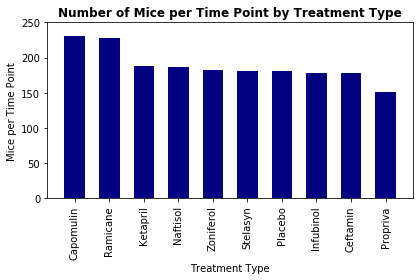

In [21]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

mice_time_points = mouse_study_data['Drug Regimen'].value_counts()
mice_time_points.plot.bar(color="navy", width=0.6)
# Embelish the plot properties improving the default display properties
plt.ylabel("Mice per Time Point")
plt.xlabel("Treatment Type")
plt.title("Number of Mice per Time Point by Treatment Type", fontdict={'fontweight':'bold', 'fontsize':12})
plt.xlim(-0.8,9.8)
plt.ylim(0,250)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  ### Observations and Insights figsize=(10,6))

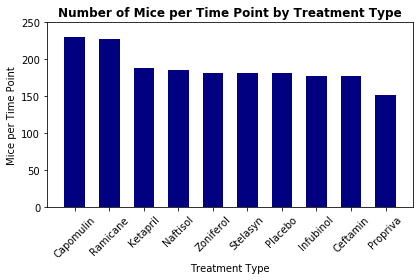

In [22]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(mice_time_points.index, mice_time_points.values, color="navy", width=0.6)
# Embelish the plot properties improving the default display properties, Uncommment plt.xticks(rotation=45) from previous plot
plt.ylabel("Mice per Time Point")
plt.xlabel("Treatment Type")
plt.title("Number of Mice per Time Point by Treatment Type", fontdict={'fontweight':'bold', 'fontsize':12})
plt.xlim(-0.8,9.8)
plt.ylim(0,250)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pie Plots

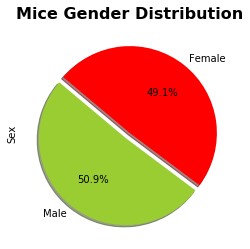

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Define global variables to be shared by both Pandas and PyPlot based pie charts
colors = ["yellowgreen", "red"]
explode = (0.075, 0)
mice_gender = mouse_study_data.Sex.value_counts()
mice_gender.plot.pie(explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Embelish the plot via title properties
plt.title("Mice Gender Distribution", fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

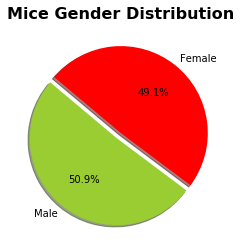

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = ["Male", "Female"]
plt.pie(mice_gender.values, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Embelish the plot via title properties - this one is local to plt object
plt.title("Mice Gender Distribution", fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

IQR = mouse_study_data.groupby("Mouse ID").max().reset_index()
#IQR.to_excel("IQR1.xlsx")
#Create a new variable using columns of interest
Pot_outlier = IQR[["Mouse ID", "Timepoint"]].merge(mouse_study_data, on=["Mouse ID", "Timepoint"], how="left")

# Selected the four most promising drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_drug = Pot_outlier.loc[Pot_outlier["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
Ramicane_drug = Pot_outlier.loc[Pot_outlier["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
Infubinol_drug = Pot_outlier.loc[Pot_outlier["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_drug = Pot_outlier.loc[Pot_outlier["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]

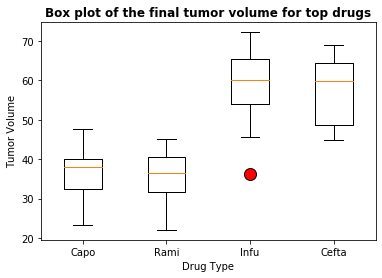

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

marker = dict(markerfacecolor="red", markersize=12)
plt.boxplot([Capomulin_drug, Ramicane_drug, Infubinol_drug, Ceftamin_drug], labels=["Capo", "Rami", "Infu", "Cefta"], flierprops=marker)
plt.title("Box plot of the final tumor volume for top drugs", fontdict={'fontweight':'bold', 'fontsize':12})
plt.xlabel("Drug Type")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

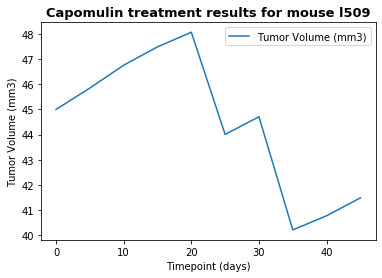

In [14]:
# Generate a line plot of #time point versus tumor volume for a mouse treated with Capomulin

# Define Series to create line plot plotting Timepoint versus Tumor Volume (mm3)
Mice_Capomulin = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin"]
Mouse_Capomulin_l509 = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "l509"]
Mouse_Capomulin_l509.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=False, figsize=(6,4))

# Embelish the plot via title properties - this one is local to plt object
plt.title("Capomulin treatment results for mouse l509", fontdict={'fontweight':'bold', 'fontsize':13})
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

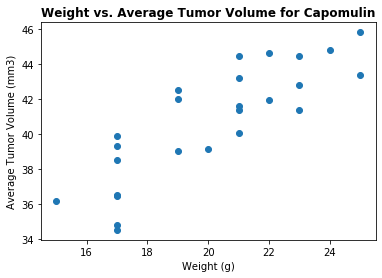

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Mice_Capomulin = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin"]
Mice_Capomulin_id = Mice_Capomulin.groupby(["Mouse ID"]).mean()

# Embelish the plot via title properties - this one is local to plt object
plt.scatter(Mice_Capomulin_id["Weight (g)"], Mice_Capomulin_id["Tumor Volume (mm3)"])
plt.title("Weight vs. Average Tumor Volume for Capomulin", fontdict={'fontweight':'bold', 'fontsize':12})
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between both factors is 0.84


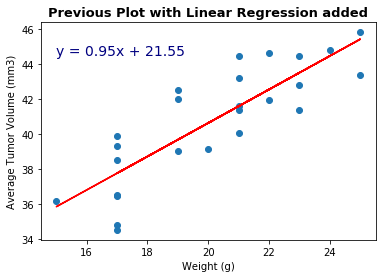

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Derived correlation coefficient
correlation = st.pearsonr(Mice_Capomulin_id["Weight (g)"], Mice_Capomulin_id["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Recreat previous scatter chart with a regression fit based on Linear Regression 
x_values = Mice_Capomulin_id["Weight (g)"]
y_values = Mice_Capomulin_id["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,44.5),fontsize=14,color="navy") 
plt.title("Previous Plot with Linear Regression added", fontdict={'fontweight':'bold', 'fontsize':13})
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()